# 1. Series and Linear Regression

1.1 Import Data 

In [2]:
import pandas as pd

In [3]:
# Files should be located in the parent directory
nyc = pd.read_csv("../january.csv")
nyc

,Date,Value,Anomaly
0,189501,26.69,-3.43
1,189601,31.48,1.36
2,189701,28.17,-1.95
3,189801,30.67,0.55
4,189901,29.68,-0.44
...,...,...,...
125,202001,35.55,5.43
126,202101,34.59,4.47
127,202201,31.17,1.05
128,202301,35.13,5.01


1.2 Clean Data

Change column names and delete unecessary numbers in the end of years

In [4]:
nyc.columns = ['Year', 'Temperature', 'Anomaly']
nyc.Year = nyc.Year.floordiv(100)
nyc

,Year,Temperature,Anomaly
0,1895,26.69,-3.43
1,1896,31.48,1.36
2,1897,28.17,-1.95
3,1898,30.67,0.55
4,1899,29.68,-0.44
...,...,...,...
125,2020,35.55,5.43
126,2021,34.59,4.47
127,2022,31.17,1.05
128,2023,35.13,5.01


Filter data up to 2018

In [5]:
nyc_2018 = nyc[nyc['Year'] <= 2018]
nyc_2018

,Year,Temperature,Anomaly
0,1895,26.69,-3.43
1,1896,31.48,1.36
2,1897,28.17,-1.95
3,1898,30.67,0.55
4,1899,29.68,-0.44
...,...,...,...
119,2014,30.56,0.44
120,2015,33.08,2.96
121,2016,32.22,2.10
122,2017,33.57,3.45


1.3 Create Series 

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    nyc_2018.Year.values.reshape(-1, 1), nyc_2018.Temperature.values, random_state=11
    )

In [7]:
x_train.shape

(93, 1)

In [8]:
x_test.shape

(31, 1)

1.4 Model Training

In [9]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=x_train, y=y_train)

LinearRegression()

Slope

In [10]:
linear_regression.coef_

array([0.01701045])

y-intercept

In [11]:
linear_regression.intercept_

-2.6604063268055285

1.5 Model testing

In [12]:
predicted = linear_regression.predict(x_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 30.82, expected: 28.94
predicted: 31.55, expected: 29.71
predicted: 30.07, expected: 26.26
predicted: 30.29, expected: 24.84
predicted: 30.99, expected: 25.86
predicted: 30.63, expected: 27.07
predicted: 30.02, expected: 34.36


1.6 Predicting future and past temperatures

In [13]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [14]:
predict(2019)

array([31.68369771])

In [15]:
predict(1890)

array([29.48934931])

1.7 Visualize

Create a scatterplot

(10.0, 60.0)

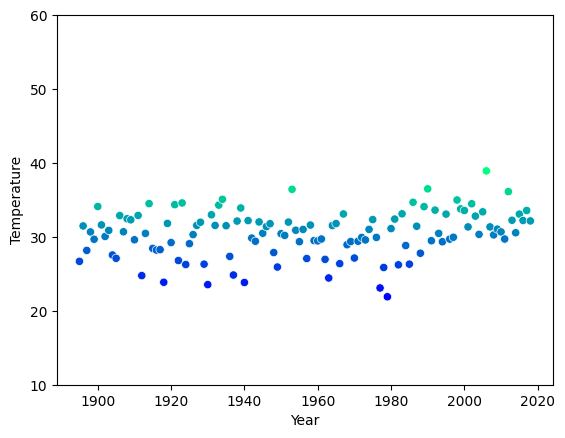

In [17]:
import seaborn as sns

axes = sns.scatterplot(
    data=nyc_2018, x='Year', y='Temperature', hue='Temperature', palette='winter', legend=False
    )
axes.set_ylim(10, 60)


Create plot with regression line

(10.0, 60.0)

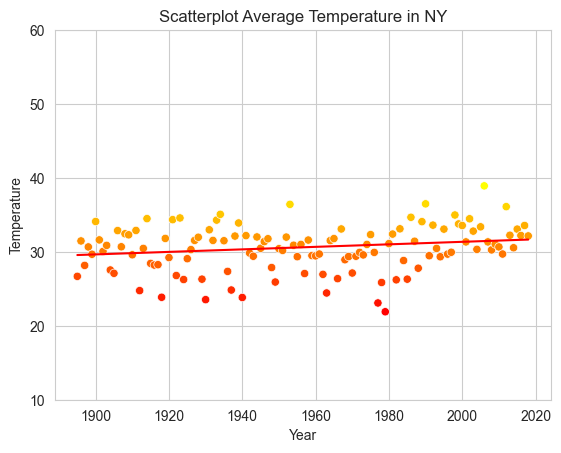

In [81]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([min(nyc_2018.Year.values), max(nyc_2018.Year.values)])
y = predict(x)

sns.set_style('whitegrid')
plt.title('Scatterplot Average Temperature in NY')
line = plt.plot(x, y, c='r')
axes = sns.scatterplot(data=nyc_2018, x='Year', y='Temperature', hue='Temperature', palette='autumn', legend=False)
axes.set_ylim(10, 60)

1.8 Compare with lab-2 result 

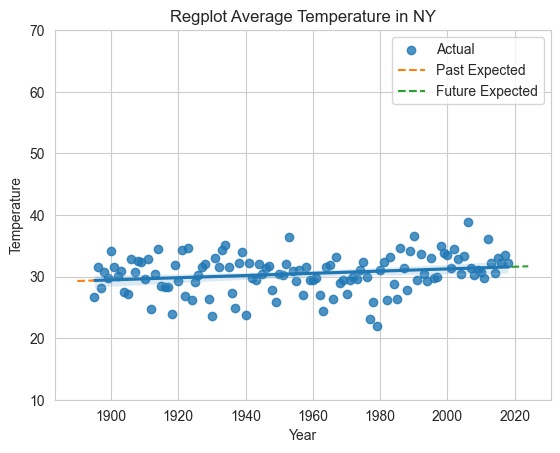

# 2. SVC Classification

2.1 Generate data

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

np.random.seed(1)
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:, 0] > 0, x_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

2.2 Visualize

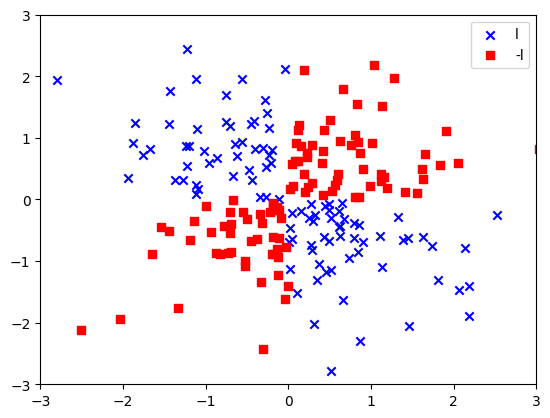

In [20]:
plt.scatter(x_xor[y_xor == 1, 0], x_xor[y_xor == 1, 1], c='b', marker='x', label='l')
plt.scatter(x_xor[y_xor == -1, 0], x_xor[y_xor == -1, 1], c='r', marker='s', label='-l')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')


2.3 Classification

Function to separate regions

In [21]:
def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0],
                    y=x[y == cl, 1], 
                    c=colors[idx], 
                    marker=markers[idx], 
                    alpha=0.7, 
                    label=cl)

    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:, 0], 
                    x_test[:, 1], 
                    c='black', 
                    alpha=1.0, 
                    linewidths=1, 
                    marker='o', 
                    s=55, 
                    label='Test set')

Using SVC

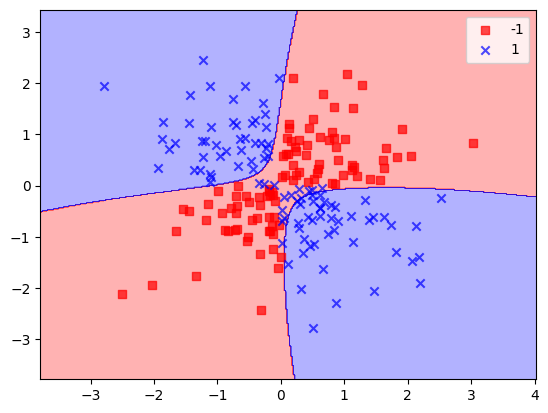

In [38]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=25.0)
svm.fit(x_xor, y_xor)
plot_decision_regions(x=x_xor, y=y_xor, classifier=svm)
plt.legend()

# 3. Compare Classificators

3.1 Import necessary libraries and load the data

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data[:, :2]
y = iris.target


3.2 Create train and test splits

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    )

3.3 Define classifiers

In [88]:
classifiers = {
    "KNeighbors": KNeighborsClassifier(n_neighbors=3),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(kernel='rbf', random_state=1, gamma=0.1, C=15.0)
}

3.4 Plotting

Setup meshgrid for plotting decision boundaries

In [40]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Create different axes and define colors

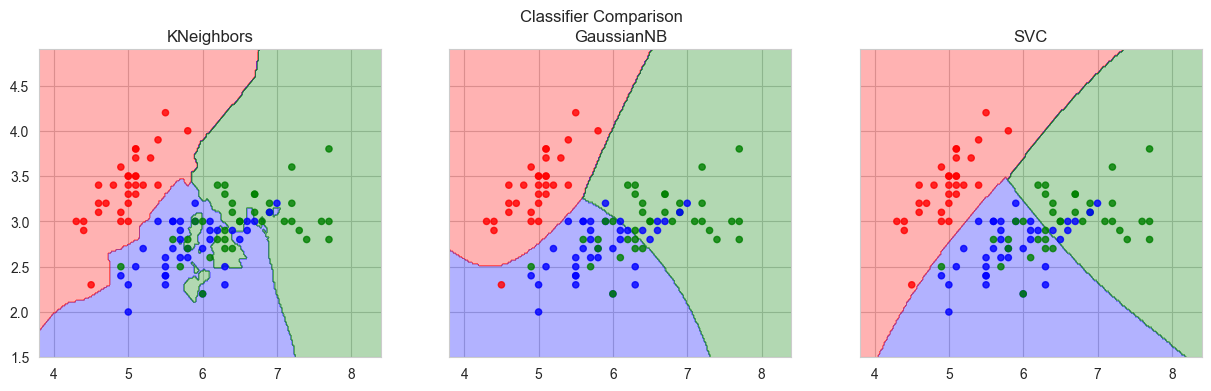

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
cmap_colors = ListedColormap(['red', 'blue', 'green'])

for i, (name, clf) in enumerate(classifiers.items()):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict for meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    axs[i].contourf(xx, yy, Z, alpha=0.3 ,cmap=cmap_colors)
    
    # Plot also the training points
    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8, cmap=cmap_colors, s=20)
    axs[i].set_title(name)

plt.suptitle("Classifier Comparison")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

3.5 Calculate and visualize accuracy

Calculating accuracy

In [75]:
accuracy_scores = {}
for name, clf in classifiers.items():
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy_scores[name] = accuracy_score(y_test, y_pred)

print("Accuracy Scores:")
for name, accuracy in accuracy_scores.items():
    print(f"{name}: {accuracy:.4f}")

Accuracy Scores:
KNeighbors: 0.7556
GaussianNB: 0.8222
SVC: 0.7333


Plot the accuracy values

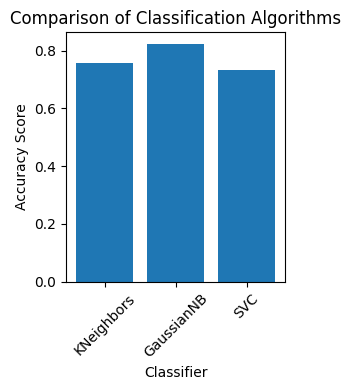

In [76]:
plt.figure(figsize=(3, 4))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel("Classifier")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Classification Algorithms")
plt.xticks(rotation=45)
plt.tight_layout()
